# Data Acquisition Exercises

In [1]:
from pydataset import data
from env import get_db_url
from sklearn.model_selection import train_test_split
from scipy import stats


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import acquire as aq
import statistics
import warnings

warnings.filterwarnings("ignore")

#### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [2]:
df_iris = data('iris')

In [3]:
#4a. print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#4b. print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [5]:
#4c. print the column names
df_iris.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

In [6]:
#4d. print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
#4e. print the summary statistics for each of the numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
filename = "Deangelo Bowen - jemison_spreadsheet_exercises - Table1_CustDetails.csv"
df_google_sheets = pd.read_csv(filename)

In [9]:
#5a. 
df_google_sheets_sample = df_google_sheets.head(100)

In [10]:
#5b. 
df_google_sheets.shape

# 7049 rows, 13 columns

(7049, 13)

In [11]:
#5c 
df_google_sheets.columns.values[0:5]

array(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'dependents'], dtype=object)

In [12]:
df_google_sheets.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
tenure               float64
dtype: object

In [13]:
#5d
list(df_google_sheets.select_dtypes(['object']))

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [14]:
#5e
math = df_google_sheets.select_dtypes(['float64'])
math.max() - math.min()

monthly_charges     100.5
total_charges      8666.0
tenure               79.3
dtype: float64

#### 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [15]:
filename = "Deangelo Bowen - jemison_spreadsheet_exercises.xlsx"
df_excel = pd.read_excel(filename)

#6a
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_internet_and_phone,partner_depends,avg_monthly_charges,match_charges,phone_service.1,internet_service.1,contract_type.1,service_type,rounded_tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,...,1,True,3,65.6,True,One Line,DSL,1 Year,Internet+Phone,9
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,...,1,True,0,59.9,True,Two or More Lines,DSL,Month-to-Month,Internet+Phone,9
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,...,1,True,0,73.9,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone,4
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,...,1,True,1,98,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone,13
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,...,1,True,1,83.9,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone,3
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,...,1,True,2,69.4,True,One Line,DSL,Month-to-Month,Internet+Phone,8
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,...,1,True,1,109.7,True,One Line,Fiber Optic,2 Year,Internet+Phone,72
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,...,1,True,1,84.65,True,Two or More Lines,Fiber Optic,2 Year,Internet+Phone,64
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,...,1,True,0,48.2,True,One Line,DSL,Month-to-Month,Internet+Phone,7
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,...,1,True,3,90.45,True,Two or More Lines,DSL,2 Year,Internet+Phone,66


In [16]:
#6b
df_excel.shape

#7049 rows, 26 columns

(7049, 26)

In [17]:
#6c
df_excel.columns.values[0:5]

array(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'dependents'], dtype=object)

In [18]:
#6d
list(df_excel.select_dtypes(['object']))

['customer_id',
 'gender',
 'partner',
 'dependents',
 'payment_type',
 'churn',
 'avg_monthly_charges',
 'match_charges',
 'phone_service.1',
 'internet_service.1',
 'contract_type.1',
 'service_type']

In [19]:
#6e 
math = df_excel.select_dtypes(['float64'])
math.max() - math.min()

is_senior_citizen       1.000000
phone_service           2.000000
internet_service        2.000000
contract_type           2.000000
monthly_charges       100.500000
total_charges        8666.000000
tenure                 79.341772
dtype: float64

#### 7. Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [20]:
# took the url from the data acquisition hyperlink file
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"


csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google= pd.read_csv(csv_export_url)

#7a
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
#7b
df_google.shape
#891 rows, #12 columns

(891, 12)

In [22]:
#7c
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
#7d
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#7e
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#7f
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Make a new python module, acquire.py to hold the following data aquisition functions:

#### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [26]:
titanic_data = aq.get_titanic_data()
titanic_data.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [27]:
iris = aq.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [28]:
telco_churn = aq.get_telco_data()
telco_churn.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

- Done

# Data Preparation Exercises

#### Using the Iris Data:

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

#### 1. Use the function defined in acquire.py to load the iris data.

In [29]:
iris = aq.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### 2. Drop the species_id and measurement_id columns.

In [30]:
iris = iris.drop(['species_id', 'measurement_id'], axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3. Rename the species_name column to just species.

In [31]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [32]:
dummy_var = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
dummy_var.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
iris = pd.concat([iris, dummy_var], axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


 #### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
iris = aq.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [35]:
def prep_iris(iris):
    iris = iris.drop(['species_id','measurement_id'], axis = 1)
    iris = iris.rename(columns={'species_name': 'species'})
    dummy_var = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
    iris = pd.concat([iris, dummy_var], axis = 1)
    return iris

In [36]:
# test function
simple_prep = prep_iris(iris)
simple_prep.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Using the Titanic dataset

#### 1. Use the function defined in acquire.py to load the Titanic data.



In [37]:
titanic = aq.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [38]:
# Dropping columns
# dropping any possible duplicate 

titanic = titanic.drop(['pclass', 'passenger_id',
                            'class','deck', 'embarked'], axis= 1)
titanic.drop_duplicates(inplace=True)
titanic

,survived,sex,age,sibsp,parch,fare,embark_town,alone
0,0,male,22.0,1,0,7.2500,Southampton,0
1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Southampton,1
3,1,female,35.0,1,0,53.1000,Southampton,0
4,0,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Queenstown,0
887,1,female,19.0,0,0,30.0000,Southampton,1
888,0,female,NaN,1,2,23.4500,Southampton,0
889,1,male,26.0,0,0,30.0000,Cherbourg,1


#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     779 non-null    int64  
 1   sex          779 non-null    object 
 2   age          676 non-null    float64
 3   sibsp        779 non-null    int64  
 4   parch        779 non-null    int64  
 5   fare         779 non-null    float64
 6   embark_town  777 non-null    object 
 7   alone        779 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [40]:
# imputing
titanic['age'] = titanic.age.fillna(titanic.age.mean())
titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     779 non-null    int64  
 1   sex          779 non-null    object 
 2   age          779 non-null    float64
 3   sibsp        779 non-null    int64  
 4   parch        779 non-null    int64  
 5   fare         779 non-null    float64
 6   embark_town  779 non-null    object 
 7   alone        779 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [41]:
# creating dummy variables
dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']],
                              dummy_na = False,
                              drop_first = [True, True])
dummy_titanic.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [42]:
# second drop
titanic = titanic.drop(['sex','embark_town'], axis= 1)

In [43]:
titanic = pd.concat([titanic, dummy_titanic], axis = 1)
titanic.head()

,survived,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1


#### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [44]:
titanic = aq.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [45]:
def prep_titanic(titanic):
    titanic = titanic.drop(['passenger_id',
                            'class','deck', 'embarked'], axis= 1)
    titanic.drop_duplicates(inplace=True)
    titanic['age'] = titanic.age.fillna(titanic.age.mean())
    titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
    dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']],
                              dummy_na = False,
                              drop_first = [True, True])
    titanic = titanic.drop(['sex','embark_town'], axis= 1)
    titanic = pd.concat([titanic, dummy_titanic], axis = 1)
    return titanic

In [46]:
titanic_prepped = prep_titanic(titanic)

In [47]:
titanic_prepped.describe()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.812751,0.525641,0.417949,34.829108,0.566667,0.625641,0.074359,0.726923
std,0.492657,0.854452,13.708828,0.988046,0.838536,52.263440,0.495854,0.484267,0.262523,0.445826
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.812751,0.000000,0.000000,15.950000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


# Using the Telco dataset

#### 1. Use the function defined in acquire.py to load the Telco data.

In [48]:
# get telco data
telco = aq.get_telco_data()
telco.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


# Takeaways
- total charges is an object. Should be a float
- No need for type ids, to inclue customer id
- No need for device protection, tech support, online backup, online security, streaming tv, streaming movies
- no nulls

#### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [49]:
# drop duplicates
telco.drop_duplicates(inplace=True)

In [50]:
telco = telco.drop(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                  'customer_id', 'online_security', 'online_backup', 'device_protection',
                  'tech_support', 'streaming_tv', 'streaming_movies'], axis= 1)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,Female,0,Yes,Yes,9,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,Male,0,No,No,9,Yes,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,Male,0,No,No,4,Yes,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,Male,1,Yes,No,13,Yes,No,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,Female,1,Yes,No,3,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [51]:
telco['total_charges'] = telco['total_charges'].str.strip()
telco = telco[telco.total_charges != '']
telco['total_charges']= telco.total_charges.astype('float')

#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [52]:
# mapping catgs. to numerics
# Yes = 1, No = 0
# idea : creating dummy columns just to drop them and keep numerics == mapping
telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,Female,0,1,1,9,1,No,1,65.6,593.30,0,One year,Mailed check,DSL
1,Male,0,0,0,9,1,Yes,0,59.9,542.40,0,Month-to-month,Mailed check,DSL
2,Male,0,0,0,4,1,No,1,73.9,280.85,1,Month-to-month,Electronic check,Fiber optic
3,Male,1,1,0,13,1,No,1,98.0,1237.85,1,Month-to-month,Electronic check,Fiber optic
4,Female,1,1,0,3,1,No,1,83.9,267.40,1,Month-to-month,Mailed check,Fiber optic


In [53]:
# create dummy for cat cols
dummy_telco = pd.get_dummies(telco[['gender', 'multiple_lines', 'contract_type',
                                     'payment_type', 'internet_service_type']])

In [54]:
# concat new cols, drop previous 
telco = pd.concat([telco, dummy_telco], axis = 1)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
0,Female,0,1,1,9,1,No,1,65.6,593.30,...,0,1,0,0,0,0,1,1,0,0
1,Male,0,0,0,9,1,Yes,0,59.9,542.40,...,1,0,0,0,0,0,1,1,0,0
2,Male,0,0,0,4,1,No,1,73.9,280.85,...,1,0,0,0,0,1,0,0,1,0
3,Male,1,1,0,13,1,No,1,98.0,1237.85,...,1,0,0,0,0,1,0,0,1,0
4,Female,1,1,0,3,1,No,1,83.9,267.40,...,1,0,0,0,0,0,1,0,1,0


### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [55]:
telco = aq.get_telco_data()

In [56]:
# train, split, validate tests, from sklearn.model_selection 
train_validate, test = train_test_split(telco, test_size=.2,
                                       random_state=123,
                                       stratify=telco.churn)

train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate.churn)


In [57]:
train.shape

(3943, 24)

In [58]:
test.shape

(1409, 24)

In [59]:
validate.shape

(1691, 24)

In [60]:
# using the split data function from the lesson, and for practice:

def split_telco_data(telco):
    train_validate, test = train_test_split(telco, test_size=.2,
                                           random_state=123,
                                           stratify=telco.churn)
    train,validate = train_test_split(train_validate, test_size=.3,
                                     random_state=123,
                                     stratify=train_validate.churn)
    return train, validate, test

In [61]:
# create the function prep_telco with the split function
def prep_telco(telco):
    
    # drop duplicates
    telco.drop_duplicates(inplace=True)
    
    # drop specific columns
    telco = telco.drop(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                  'customer_id', 'online_security', 'online_backup', 'device_protection',
                  'tech_support', 'streaming_tv', 'streaming_movies'], axis= 1)
    
    # strip spaces from total charges, turn into a float
    telco['total_charges'] = telco['total_charges'].str.strip()
    telco = telco[telco.total_charges != '']
    telco['total_charges']= telco.total_charges.astype('float')
    
    # map Yes = 1, No = 0
    telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    # create dummy for cat cols to numeric cols
    dummy_telco = pd.get_dummies(telco[['gender', 'multiple_lines', 'contract_type',
                                     'payment_type', 'internet_service_type']])
    
    # concat
    telco = pd.concat([telco, dummy_telco], axis = 1)
    
    # train validate test
    train, validate, test = split_telco_data(telco)
    
    return train, validate, test

In [62]:
# observe train validate test
train, validate, test = prep_telco(telco)

In [63]:
train.info()
# no nulls, check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  3937 non-null   object 
 1   senior_citizen                          3937 non-null   int64  
 2   partner                                 3937 non-null   int64  
 3   dependents                              3937 non-null   int64  
 4   tenure                                  3937 non-null   int64  
 5   phone_service                           3937 non-null   int64  
 6   multiple_lines                          3937 non-null   object 
 7   paperless_billing                       3937 non-null   int64  
 8   monthly_charges                         3937 non-null   float64
 9   total_charges                           3937 non-null   float64
 10  churn                                   3937 non-null   i

In [64]:
validate.info()
# no nulls, check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 816 to 3718
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  1688 non-null   object 
 1   senior_citizen                          1688 non-null   int64  
 2   partner                                 1688 non-null   int64  
 3   dependents                              1688 non-null   int64  
 4   tenure                                  1688 non-null   int64  
 5   phone_service                           1688 non-null   int64  
 6   multiple_lines                          1688 non-null   object 
 7   paperless_billing                       1688 non-null   int64  
 8   monthly_charges                         1688 non-null   float64
 9   total_charges                           1688 non-null   float64
 10  churn                                   1688 non-null   in

In [65]:
test.info()
# no nulls, check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 3311 to 3690
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  1407 non-null   object 
 1   senior_citizen                          1407 non-null   int64  
 2   partner                                 1407 non-null   int64  
 3   dependents                              1407 non-null   int64  
 4   tenure                                  1407 non-null   int64  
 5   phone_service                           1407 non-null   int64  
 6   multiple_lines                          1407 non-null   object 
 7   paperless_billing                       1407 non-null   int64  
 8   monthly_charges                         1407 non-null   float64
 9   total_charges                           1407 non-null   float64
 10  churn                                   1407 non-null   i

# Takeaways
- Using train, test, validate helps split the data into categories for machine learning
- cleaning the data and then preparing them for entry into a machine learning model is best practice.

# Exploratory Analysis Exercises

## Part 1 - Iris Data

#### 1. Acquire, prepare & and split your data

In [66]:
import prepare as prep
import acquire as aq

In [67]:
# acquire data
iris = aq.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [68]:
# prepare data. (already done, grab from prepare.py)
df = prep.prep_iris(iris)
df

(     sepal_length  sepal_width  petal_length  petal_width     species
 79            5.7          2.6           3.5          1.0  versicolor
 36            5.5          3.5           1.3          0.2      setosa
 133           6.3          2.8           5.1          1.5   virginica
 95            5.7          3.0           4.2          1.2  versicolor
 18            5.7          3.8           1.7          0.3      setosa
 139           6.9          3.1           5.4          2.1   virginica
 20            5.4          3.4           1.7          0.2      setosa
 31            5.4          3.4           1.5          0.4      setosa
 6             4.6          3.4           1.4          0.3      setosa
 115           6.4          3.2           5.3          2.3   virginica
 91            6.1          3.0           4.6          1.4  versicolor
 145           6.7          3.0           5.2          2.3   virginica
 125           7.2          3.2           6.0          1.8   virginica
 82   

In [69]:
# split data
train, validate, test = prep.prep_iris(iris)

In [70]:
# main dataset
train.shape

(84, 5)

In [71]:
validate.shape

(36, 5)

In [72]:
test.shape

(30, 5)

# 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [73]:
# operate only on train dataset
# removed unit8 species_versicolor/setosa cols. Check prep.py

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [74]:
#unit8's removed
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [75]:
# compute descriptive stats
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


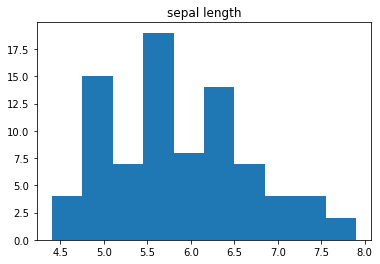

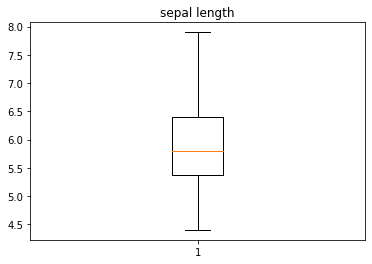

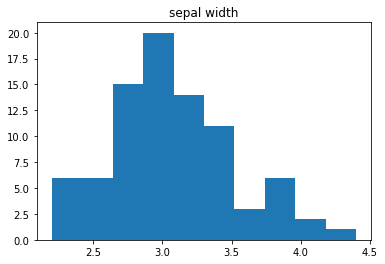

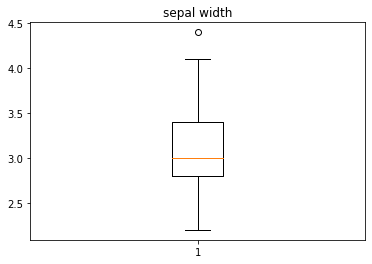

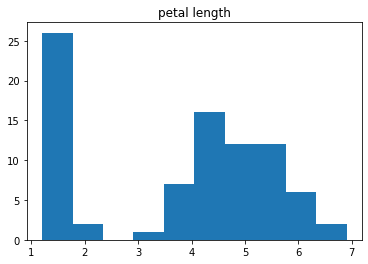

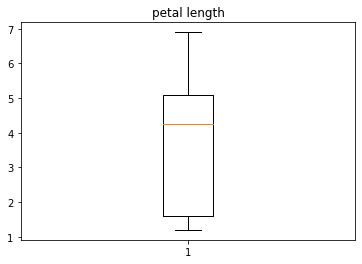

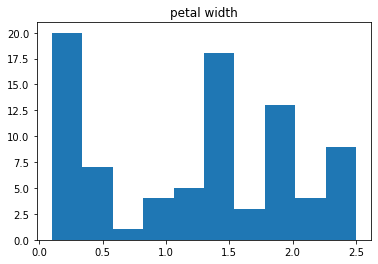

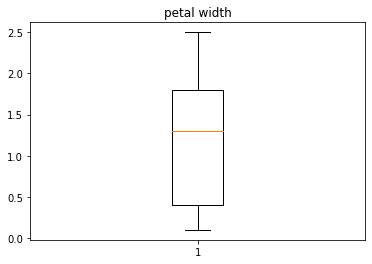

In [76]:
# plot numeric cols in histogram, boxplot
# Plotting the numeric columns 
# for loop is cleaner than doing each column individually, so I will take this route
# 
numcols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numcols:
    #in order:
    #plot hist of # col
    plt.hist(train[col])
    # plt title of # col
    # replace underscore with space
    plt.title(col.replace('_', ' '))
    #show plt
    plt.show()
    # Now boxplot
    plt.boxplot(train[col])
    plt.title(col.replace('_', ' '))
    plt.show()
    
# inspired by https://stackoverflow.com/questions/54555052/plotting-multiple-figures-in-a-loop

- ## For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [77]:
freq_table = train.groupby('species').species.agg(['count']).reset_index()
# reset_index function resets the index of the dataframe else, when 
# inputting to a sns boxplot, the boxplot will not be able to read an unindexed
# category
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html


freq_table 

,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


<AxesSubplot:xlabel='species', ylabel='count'>

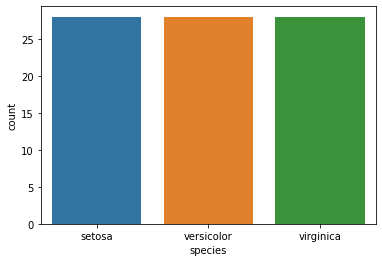

In [78]:
# bar plot via seaborn
sns.barplot(data = freq_table, x='species', y= 'count')

# Takeaways

- There is an even distribution between the species in count
- There are various spikes in petal width and length
- petal length standard deviation is vastly greater than it's counterparts which could have some significance in identifying type of flower. 

# 3. Bivariate Stats

- ### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


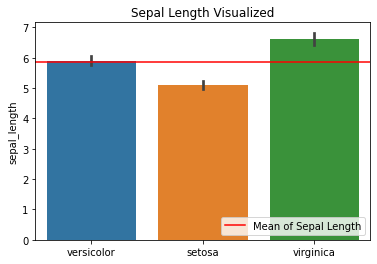

In [80]:
# Sepal Length Visualized
plt.title('Sepal Length Visualized')
sns.barplot(x='species', y='sepal_length', data = train)

# get mean
sepal_mean = train.sepal_length.mean()

#horizontal line on axis, axhline
plt.axhline(sepal_mean, label='Mean of Sepal Length', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

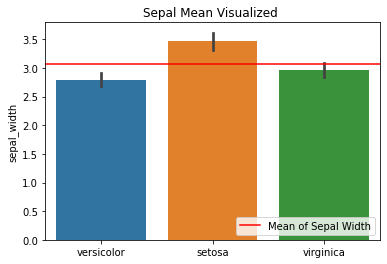

In [81]:
# Sepal Width Visualized
plt.title('Sepal Mean Visualized ')
sns.barplot(x='species', y='sepal_width', data = train)

# get mean
sepal_mean = train.sepal_width.mean()

#horizontal line on axis, axhline
plt.axhline(sepal_mean, label='Mean of Sepal Width', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

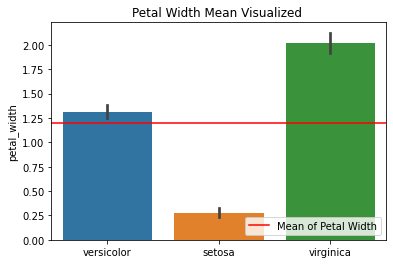

In [82]:
# Petal Width Visualized
plt.title('Petal Width Mean Visualized ')
sns.barplot(x='species', y='petal_width', data = train)

# get mean
petal_mean = train.petal_width.mean()

#horizontal line on axis, axhline
plt.axhline(petal_mean, label='Mean of Petal Width', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

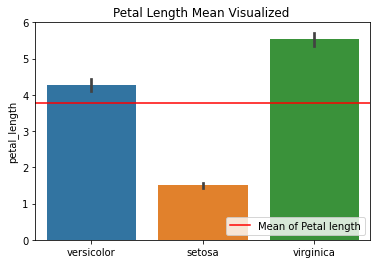

In [83]:
# Petal Length Visualized
plt.title('Petal Length Mean Visualized ')
sns.barplot(x='species', y='petal_length', data = train)

# get mean
petal_mean = train.petal_length.mean()

#horizontal line on axis, axhline
plt.axhline(petal_mean, label='Mean of Petal length', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

- For each measurement type, compute the descriptive statistics for each species.

In [84]:
# viriginica species
virginica = train[train.species == 'virginica']
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [85]:
# versicolor species
versicolor = train[train.species == 'versicolor']
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [86]:
# setosa species 
setosa = train[train.species == 'setosa']
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


- #### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [87]:
t, p = stats.mannwhitneyu(virginica.petal_width, 
                         versicolor.petal_width,
                         alternative= 'greater')
t, p

(767.0, 3.235595834904965e-10)

In [88]:
t, p = stats.mannwhitneyu(virginica.petal_length, 
                         versicolor.petal_length,
                         alternative= 'greater')
t, p

(776.5, 1.4739917857575313e-10)

In [89]:
t, p = stats.mannwhitneyu(virginica.sepal_width, 
                         versicolor.sepal_width,
                         alternative= 'greater')
t, p

(510.0, 0.02628629569922847)

In [90]:
t, p = stats.mannwhitneyu(virginica.sepal_length, 
                         versicolor.sepal_length,
                         alternative= 'greater')
t, p

(676.5, 1.541014598267054e-06)

#### cool for loop solution

In [91]:
measurements = ['sepal_length', 'sepal_width', 'petal_length',
               'petal_width']

for measurement in measurements:
    t, p = stats.mannwhitneyu(virginica[measurement], 
                         versicolor[measurement],
                         alternative= 'greater')
    print(f'Versicolor and Virginica {measurement}')
    print(t,',',p)
    print('\n')

Versicolor and Virginica sepal_length
676.5 , 1.541014598267054e-06


Versicolor and Virginica sepal_width
510.0 , 0.02628629569922847


Versicolor and Virginica petal_length
776.5 , 1.4739917857575313e-10


Versicolor and Virginica petal_width
767.0 , 3.235595834904965e-10




# Takeaways :
- Petal length seems to be a strong indicator of specicies
- this is also true for the max of the width and length
- setosa has the shortest petals in this observation


# 4. Multivariate Statistics

- ### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [92]:
# create new column to show interation of sepal and petal 
# what new calculation can we get out of the dataframe
# we have the length and the width, so it's possible to 
# calculate the area of the sepal and petal
'(lxw = area)'

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


In [93]:
# list of all possible interations.
# 4 rows, 8 variables should cover all interations
# also, subplot cannot take more than 4 splots
interactions = [('sepal_length', 'sepal_width'),
              ('petal_length', 'petal_width'),
              ('sepal_area', 'petal_area'),
              ('sepal_length', 'petal_length')]

In [94]:
# create function which takes each interactions and plots them 
# after taking a subset in the train dataframe and grouping
# by the species name
x = interactions[0][0]
y = interactions[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

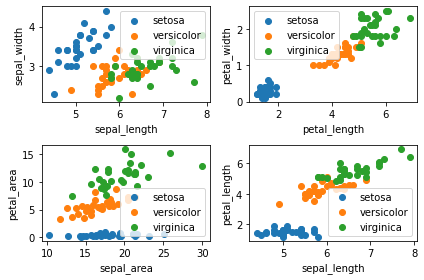

In [95]:
# plotting each subplot by interaction
plt.subplot(2,2,1)
scatter_species(interactions[0][0], interactions[0][1])
plt.subplot(2,2,2)
scatter_species(interactions[1][0], interactions[1][1])
plt.subplot(2,2,3)
scatter_species(interactions[2][0], interactions[2][1])
plt.subplot(2,2,4)
scatter_species(interactions[3][0], interactions[3][1])
plt.tight_layout()

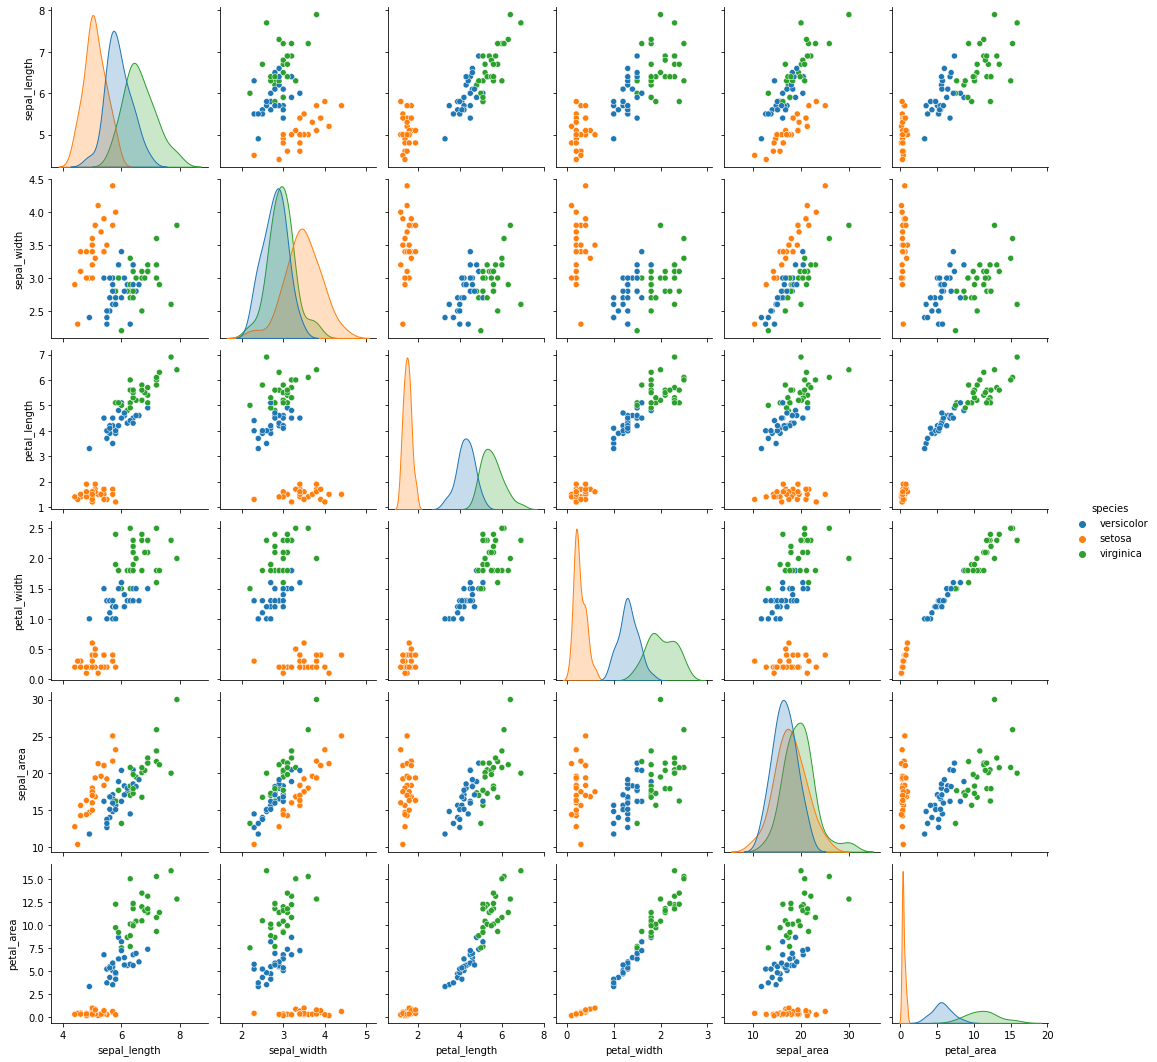

In [96]:
# sns pairplot matrix. Much better than pandas
sns.pairplot(train, hue= 'species')
plt.show()

- #### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

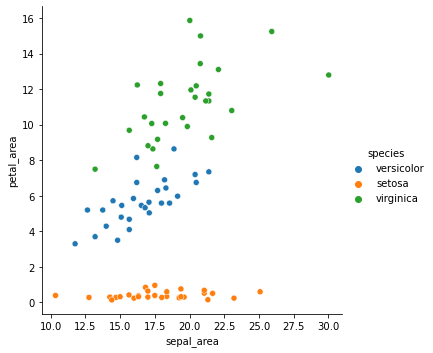

In [97]:
sns.relplot(data = train, x = 'sepal_area', y='petal_area',
          kind = 'scatter', hue = 'species')

- #### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [98]:
# melt() function melts a dataframe
# melting is the act of combining a dataframe into a variables
# and values dataframe
melted_df = train.melt()
melted_df.head()

,variable,value
0,sepal_length,5.7
1,sepal_length,5.5
2,sepal_length,6.3
3,sepal_length,5.7
4,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

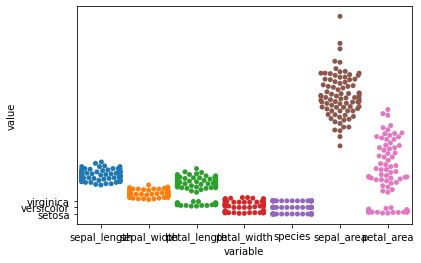

In [99]:
sns.swarmplot(x = 'variable', y = 'value', data = melted_df)

- #### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Is petal width between virginica and versicolor significantly different?

H0: Petal width is similar between the two. 
Ha: Petal width is siginificantly different between the two.

In [100]:
alpha = 0.5

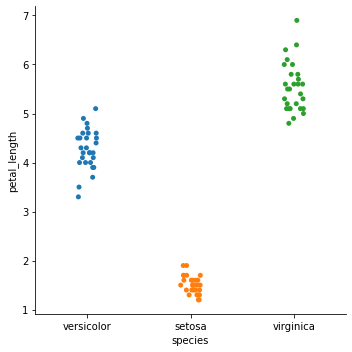

In [101]:
sns.catplot(data = train, x='species', y='petal_length')

In [102]:
stats.mannwhitneyu(virginica.petal_length, 
                   versicolor.petal_length
                  )


MannwhitneyuResult(statistic=776.5, pvalue=2.9479835715150625e-10)

We fail to reject the null hypothesis as we conclude that there is siginificance between the two.

# Exercises Part II

#### Explore your titanic dataset more completely.

In [103]:
titanic = aq.get_titanic_data()

In [104]:
df = prep.prep_titanic(titanic)

In [109]:
train, validate, test = prep.prep_titanic(titanic)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 631 to 167
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 436 non-null    int64  
 1   pclass                   436 non-null    int64  
 2   age                      436 non-null    float64
 3   sibsp                    436 non-null    int64  
 4   parch                    436 non-null    int64  
 5   fare                     436 non-null    float64
 6   alone                    436 non-null    int64  
 7   sex_male                 436 non-null    uint8  
 8   embark_town_Queenstown   436 non-null    uint8  
 9   embark_town_Southampton  436 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 28.5 KB


In [113]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
631,0,3,51.0,0,0,7.0542,1,1,0,1
108,0,3,38.0,0,0,7.8958,1,1,0,1
365,0,3,30.0,0,0,7.2500,1,1,0,1
701,1,1,35.0,0,0,26.2875,1,1,0,1
449,1,1,52.0,0,0,30.5000,1,1,0,1


- ## Determine drivers of the target variable
- Target Variable: "Survived"
- Survived = Yes = 1 No = 0

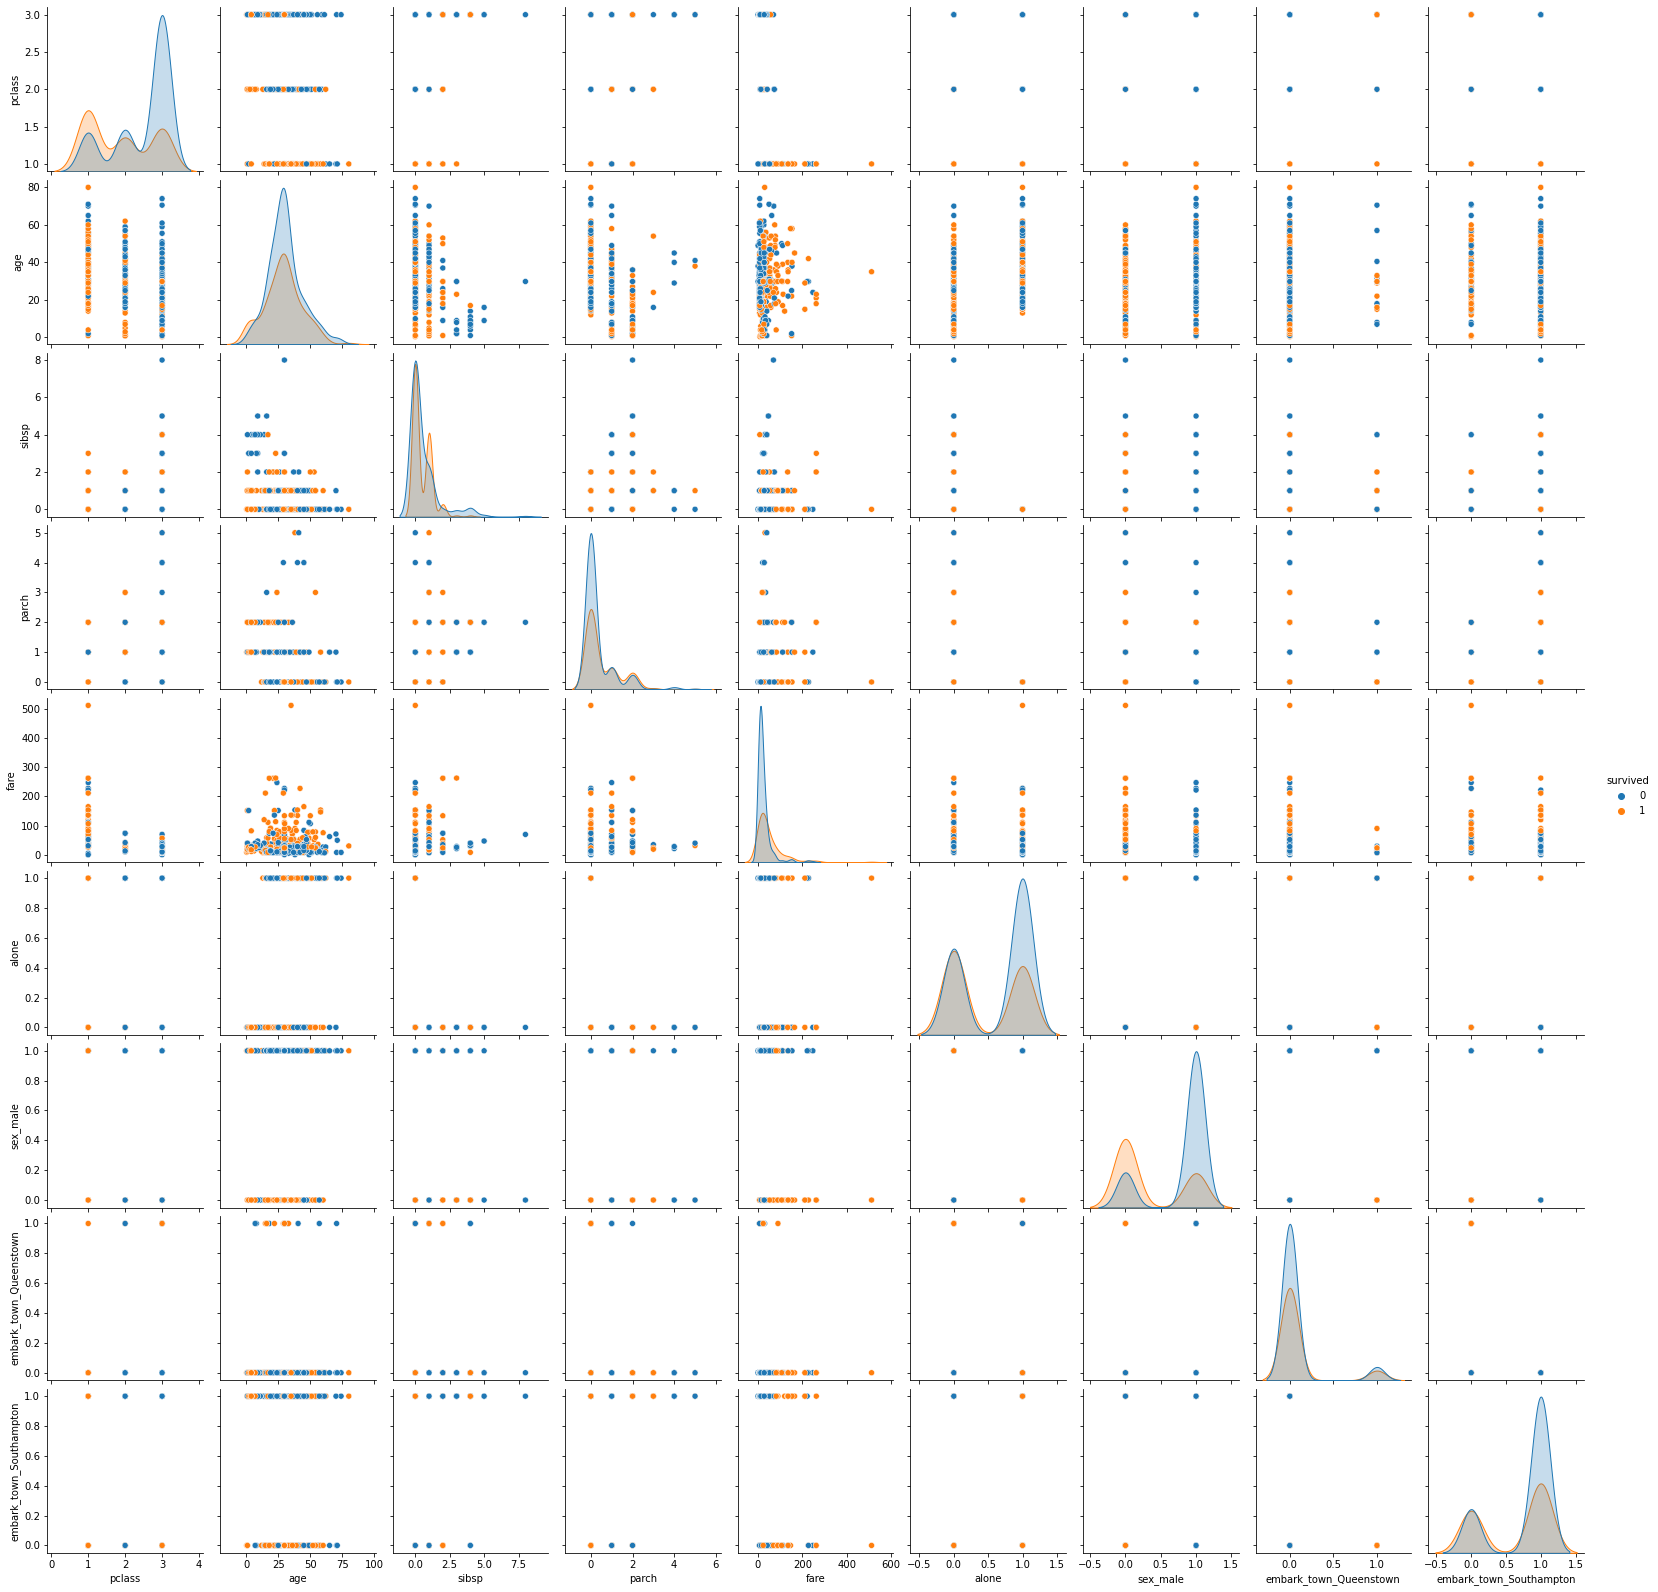

In [115]:
# pairplot of survived by category
sns.pairplot(train, hue= 'survived')
plt.show()

# works, but isn't very clean, so we will create multiple 
# Instances of traget variable data instead
# target takeaways from the pairplot
# x age and y fair

<AxesSubplot:xlabel='age', ylabel='fare'>

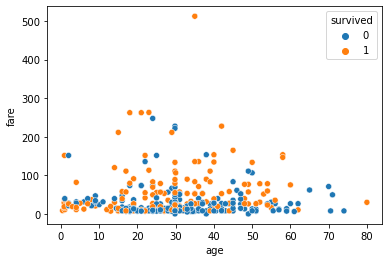

In [139]:
sns.scatterplot(data=train, x='age', y='fare', hue='survived')

## takeaway: 
- Fare and age seem to have the most relevance in the ouctome of those who survived or not in the dataset. 
- Those who paid more seem to have most likely survived 

### Determine if certain columns should be dropped